In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from keras.utils import to_categorical

/Users/chakryaros/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Import Mnist Dataset

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

In [2]:
train_images_filepath = 'dataset/mnist_dataset/train-images.idx3-ubyte'
train_labels_filepath = 'dataset/mnist_dataset/train-labels.idx1-ubyte'
test_images_filepath = 'dataset/mnist_dataset/t10k-images.idx3-ubyte'
test_labels_filepath = 'dataset/mnist_dataset/t10k-labels.idx1-ubyte'

In [3]:
X_train, y_train = loadlocal_mnist( train_images_filepath, train_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)

In [4]:
print("The shape of of X_train: ", X_train.shape)
print("The shape of of y_train: ", y_train.shape)

The shape of of X_train:  (60000, 784)
The shape of of y_train:  (60000,)


In [5]:
print("The shape of of X_test: ", X_test.shape)
print("The shape of of y_test: ", y_test.shape)

The shape of of X_test:  (10000, 784)
The shape of of y_test:  (10000,)


## Data visualization on Minist Dataset

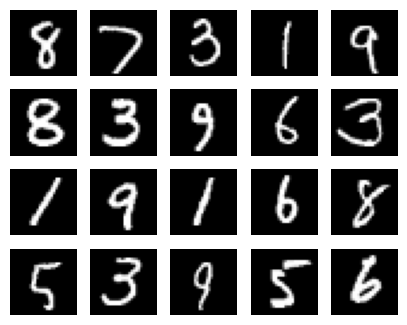

In [6]:
# sample 20 mnist digits from train dataset
x = X_train.reshape(60000, 28, 28)
indexes = np.random.randint(0, x.shape[0], size=20)
images = x[indexes]
labels = y_train[indexes]


# plot the 20 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))

X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
print("The shape of of X_tain after reshape: ", X_train.shape)
print("The shape of of y_test after reshape: ", X_test.shape)

# convert to one-hot vector
y_train_vector = to_categorical(y_train, num_labels)
y_test_vector = to_categorical(y_test, num_labels)
print("The shape of of X_tain after convert to one-hot vector: ", y_train_vector.shape)
print("The shape of of y_test after convert to one-hot vector: ", y_test_vector.shape)

The shape of of X_tain after reshape:  (60000, 28, 28)
The shape of of y_test after reshape:  (10000, 28, 28)
The shape of of X_tain after convert to one-hot vector:  (60000, 10)
The shape of of y_test after convert to one-hot vector:  (10000, 10)


## Building and Training the Classification CNN

### Importing the Keras libraries and packages

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

### Creating the CNN

In [9]:
def create_cnn_model():
    model = Sequential([
        tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

## Build and Compare Adam optimizer with other optimizers

In [10]:
def train_cnn_model(optimizer, x_train, y_train, x_val, y_val):
    print("Opimizer: ", optimizer)
    model = create_cnn_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, validation_split=0.2, verbose=2)
    return model, history

In [11]:
adam_cnn_model, adam_cnn_history = train_cnn_model(Adam(),X_train, y_train_vector,
                                                  X_test, y_test_vector)
rmsprop_cnn_model, rmsprop_cnn_history = train_cnn_model(RMSprop(), X_train, y_train_vector,
                                                         X_test, y_test_vector)
adagrad_cnn_model, adagrad_cnn_history = train_cnn_model(Adagrad(learning_rate=0.01), X_train, y_train_vector,
                                                         X_test, y_test_vector)
sgd_cnn_model, sgd_cnn_history = train_cnn_model(SGD(learning_rate=0.01, nesterov=True), X_train, y_train_vector, 
                                                 X_test, y_test_vector)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x16ea47dc0>
Epoch 1/10


/Users/chakryaros/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 24s - 52ms/step - accuracy: 0.7212 - loss: 0.9674 - val_accuracy: 0.9497 - val_loss: 0.1782
Epoch 2/10
469/469 - 24s - 50ms/step - accuracy: 0.9613 - loss: 0.1386 - val_accuracy: 0.9679 - val_loss: 0.1154
Epoch 3/10
469/469 - 24s - 50ms/step - accuracy: 0.9754 - loss: 0.0823 - val_accuracy: 0.9782 - val_loss: 0.0791
Epoch 4/10
469/469 - 24s - 50ms/step - accuracy: 0.9828 - loss: 0.0575 - val_accuracy: 0.9810 - val_loss: 0.0662
Epoch 5/10
469/469 - 24s - 51ms/step - accuracy: 0.9861 - loss: 0.0446 - val_accuracy: 0.9855 - val_loss: 0.0534
Epoch 6/10
469/469 - 24s - 50ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9830 - val_loss: 0.0568
Epoch 7/10
469/469 - 24s - 51ms/step - accuracy: 0.9912 - loss: 0.0287 - val_accuracy: 0.9844 - val_loss: 0.0572
Epoch 8/10
469/469 - 24s - 51ms/step - accuracy: 0.9922 - loss: 0.0267 - val_accuracy: 0.9857 - val_loss: 0.0515
Epoch 9/10
469/469 - 24s - 51ms/step - accuracy: 0.9927 - loss: 0.0227 - val_accuracy: 0.9870 - val_loss: 0

### Evaluate the model on the test set

In [12]:
loss_adam, acc_adm = adam_cnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of adam: %.1f%%" % (100.0 * acc_adm))
loss_rmsprop, acc_rmsprop = rmsprop_cnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of RMSprop: %.1f%%" % (100.0 * acc_rmsprop))
loss_adagrad, acc_adagrad = adagrad_cnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of adaGrad: %.1f%%" % (100.0 * acc_adagrad))
loss_sgd, acc_sgd = sgd_cnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of SGD: %.1f%%" % (100.0 * acc_sgd))

79/79 - 1s - 16ms/step - accuracy: 0.9854 - loss: 0.0581

Test accuracy of adam: 98.5%
79/79 - 1s - 15ms/step - accuracy: 0.9882 - loss: 0.0734

Test accuracy of RMSprop: 98.8%
79/79 - 1s - 15ms/step - accuracy: 0.9855 - loss: 0.0478

Test accuracy of adaGrad: 98.5%
79/79 - 1s - 15ms/step - accuracy: 0.0980 - loss: nan

Test accuracy of SGD: 9.8%


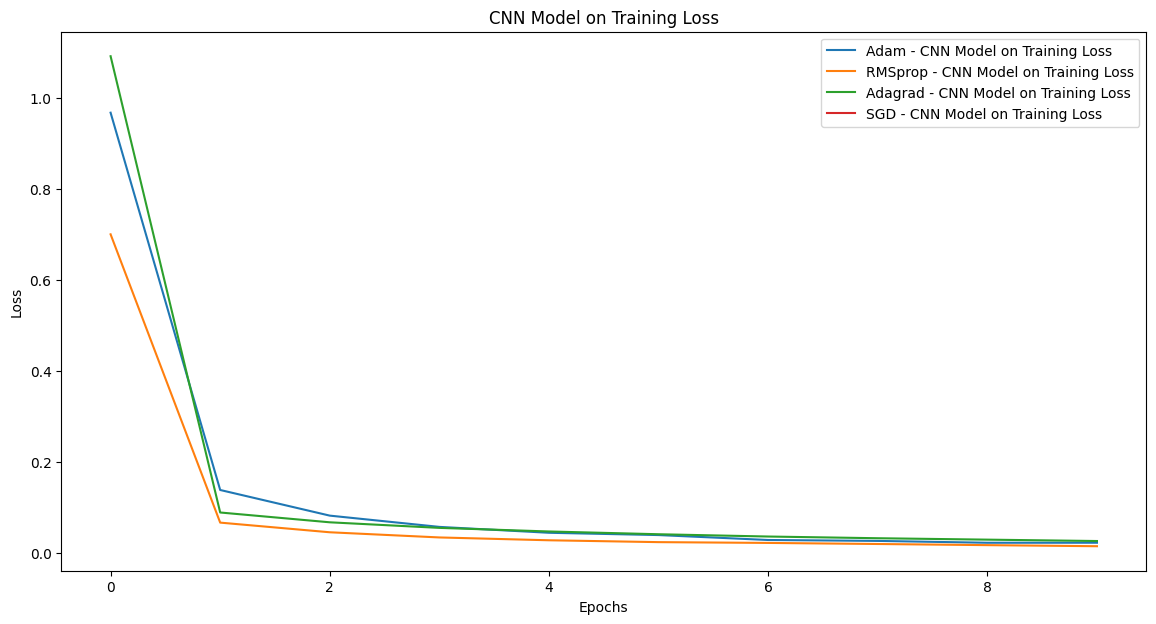

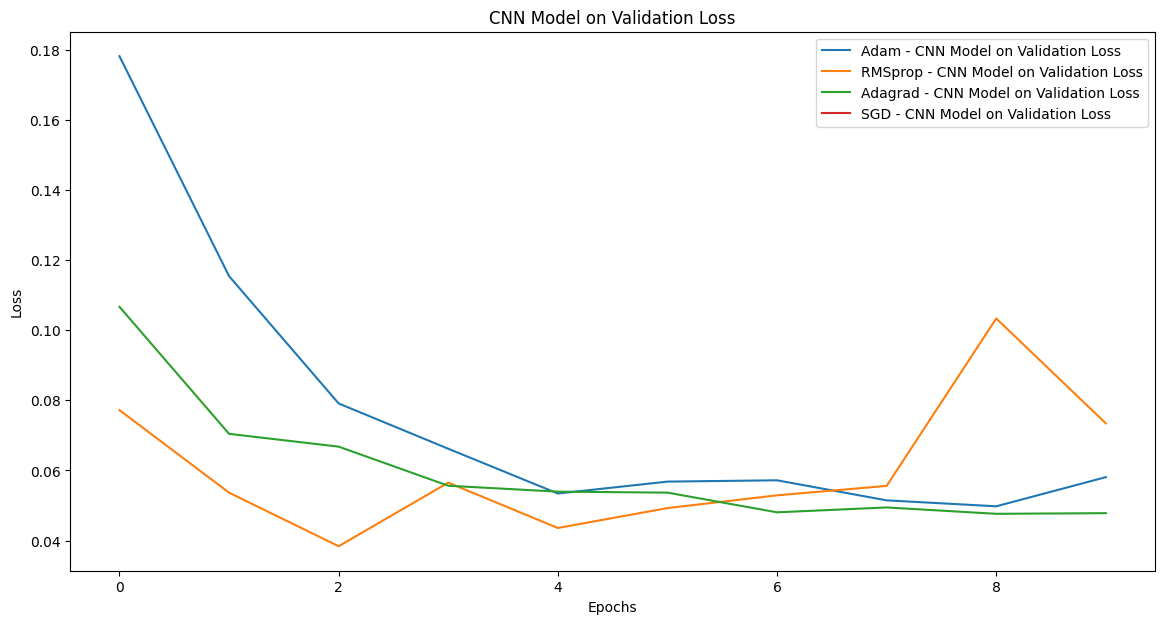

In [17]:
# Function to plot training and validation loss
def plot_loss(histories, optimizer_names, loss='loss'):

    if loss == 'val_loss':
        title = 'CNN Model on Validation Loss'
    else:
        title = 'CNN Model on Training Loss'

    plt.figure(figsize=(14, 7))

    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history[loss], label=f'{name} - {title}')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# Plot the results
histories = [adam_cnn_history, rmsprop_cnn_history, adagrad_cnn_history, sgd_cnn_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'], 'loss')
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'], 'val_loss')

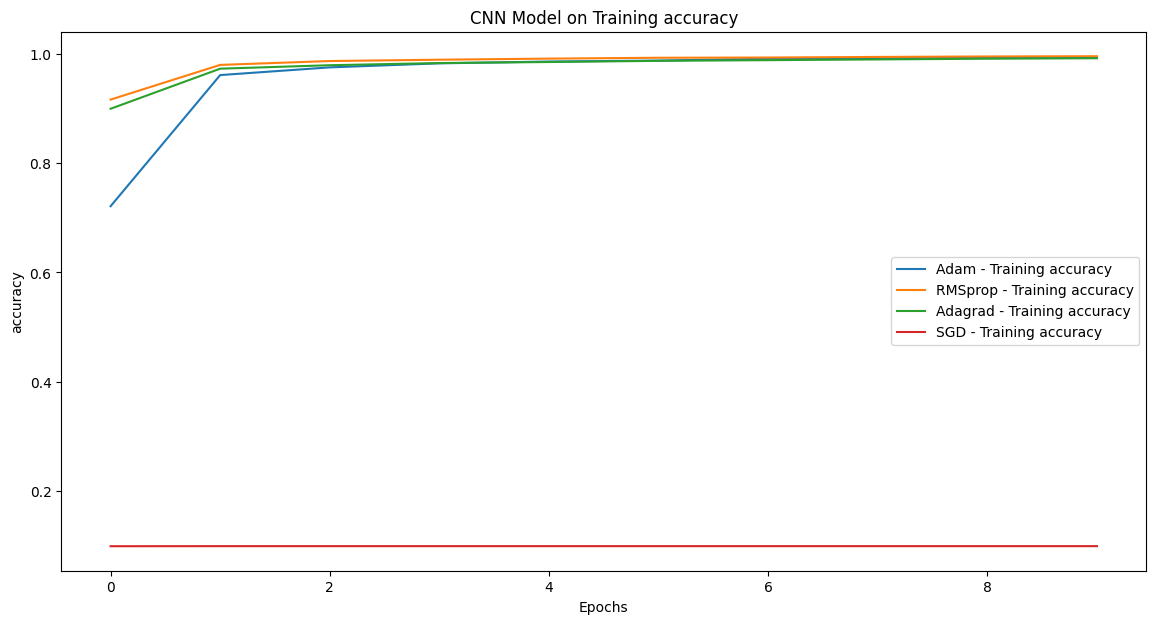

In [18]:
# Function to plot training accuracy
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Training accuracy')
    
    plt.title('CNN Model on Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])